# Flakiness of automatically generated Python tests: An empirical analysis

In [1]:
from pathlib import Path
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn

sbn.set()
sbn.set_palette("bright")
base_path = Path(".").absolute().parent
savefig: bool = False
auto_tests: bool = True

flapy_2022_05_20 = base_path/"src/results/flapy-results_20220522_200203/!results_csvs/passed_failed_results.csv"
flapy_2022_05_24 = base_path/"src/results/flapy-results_20220524_115313/!results_csvs/passed_failed_results.csv"
flapy_2022_06_06_version_0_21_0 = base_path/"src/results/flapy-results_20220606_143702/!results_csvs/passed_failed.csv"
flapy_no_tests_to_be_run_version_0_21_0 = base_path/"src/results/flapy-results-no-tests-to-be-run/flapy-results_20220612_200531/!results_csvs/test_overview.csv"

df = pd.read_csv(flapy_2022_06_06_version_0_21_0)
if auto_tests:
    df = df[df['Test_classname'].notna()]
    df = df[df['Test_classname'].str.contains('pynguin_auto_tests_')]
df_repos = pd.read_csv(base_path/"repositories_flakiness_big.csv")
df['Project_Name'].describe()

count                9088
unique                359
top       recipe-scrapers
freq                  695
Name: Project_Name, dtype: object

In [2]:
df_repos['NAME'].describe()

count                796
unique               796
top       apache-airflow
freq                   1
Name: NAME, dtype: object

## Information about the repositories and about the pynguin sucess rate

In [3]:
num_repos = len(df_repos)
num_repos_succeed = len(df['Project_Name'].unique())
print("Number of repos with generated tests: " + "\n" + str(num_repos_succeed))
print("Number of repos: " + "\n" + str(num_repos))
print("Number of projects pynguin has generated tests for: " + "\n" + str(format((num_repos_succeed / num_repos) * 100, ".3f")) + "%")

Number of repos with generated tests: 
359
Number of repos: 
796
Number of projects pynguin has generated tests for: 
45.101%


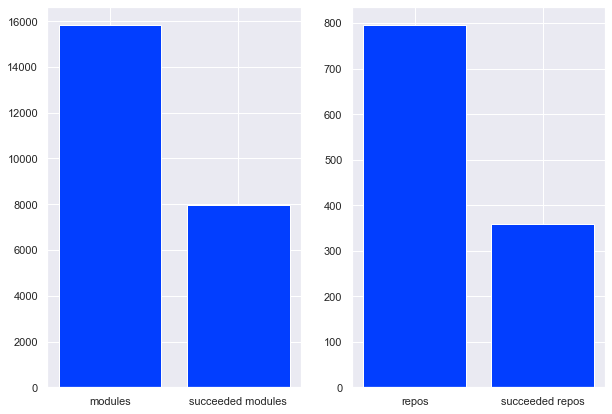

In [4]:
df_repos_succeed = df_repos[df_repos['NAME'].isin(df['Project_Name'])]
modules_df = df_repos_succeed['MODULES']
number_of_modules_list_succeeded_repos = []
number_of_modules_succeeded_repos: int = 0
for index, row in modules_df.iteritems():
    row_list = row.split(",")
    number_of_modules_list_succeeded_repos.append(len(row_list))
    number_of_modules_succeeded_repos += len(row_list)
number_of_succeeded_repos: int = len(df_repos_succeed['NAME'].unique())

number_of_modules_list_repos = []
number_of_modules_repos: int = 0
modules_df = df_repos['MODULES']
for index, row in modules_df.iteritems():
    row_list = row.split(",")
    number_of_modules_list_repos.append(len(row_list))
    number_of_modules_repos += len(row_list)

figure = plt.figure(figsize=(10,7))
bar1 = figure.add_subplot(121)
plt.grid(True)
bar2 = figure.add_subplot(122)
bar1.bar(["modules", "succeeded modules"], [number_of_modules_repos, number_of_modules_succeeded_repos])
bar2.bar(["repos", "succeeded repos"], [num_repos, number_of_succeeded_repos])
plt.grid(True)

if savefig:
    plt.savefig("./figures/succeeding_repos_modules.png", dpi=1200)

plt.show()

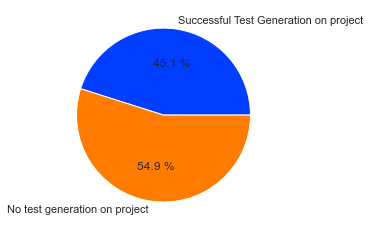

In [5]:
y = ['Successful Test Generation on project', 'No test generation on project']
x = [number_of_succeeded_repos, num_repos-number_of_succeeded_repos]
plt.pie(x, labels=y, autopct='%.1f %%')

if savefig:
    plt.savefig("./figures/testGen_noTestGen.png", dpi=1200)

plt.show()

## First We want to know some basic information about the experiment
### Number of Flaky tests, ratio

In [6]:
flaky_tests = df.loc[df["flaky?"] != "not flaky"]
number_flaky_tests = len(flaky_tests)
number_non_flaky_tests = len(df) - number_flaky_tests
print("Flaky tests: " + str(len(flaky_tests)))
print("Num tests: " + str(len(df)))

flaky_to_not_flaky_ratio = len(flaky_tests) / len(df)
flaky_to_not_flaky_ratio = format(flaky_to_not_flaky_ratio*100, ".3f")
print("Ratio: " + str(flaky_to_not_flaky_ratio) + " %")

Flaky tests: 39
Num tests: 9088
Ratio: 0.429 %


### Information about the flaky repos

In [7]:
flaky_tests_bool = df['flaky?']!='not flaky'
flaky_tests = df[flaky_tests_bool]
repos_of_flaky_tests_bool = df_repos['NAME'].isin(flaky_tests['Project_Name'])
repos_of_flaky_tests = df_repos[repos_of_flaky_tests_bool]

modules_df = repos_of_flaky_tests['MODULES']
number_of_modules_list_flaky_repos = []
number_of_modules_in_flaky_repos: int = 0
for index, row in modules_df.iteritems():
    row_list = row.split(",")
    number_of_modules_list_flaky_repos.append(len(row_list))
    number_of_modules_in_flaky_repos += len(row_list)
print("Number of modules in Flaky Repos: " + str(number_of_modules_in_flaky_repos))

number_of_flaky_repos: int = len(repos_of_flaky_tests)
print("Number of Flaky repos: " + str(number_of_flaky_repos))
print("Flaky Repo to repo ratio: " + str(format(100*(number_of_flaky_repos / number_of_succeeded_repos), ".2f")) + "%")

Number of modules in Flaky Repos: 626
Number of Flaky repos: 16
Flaky Repo to repo ratio: 4.46%


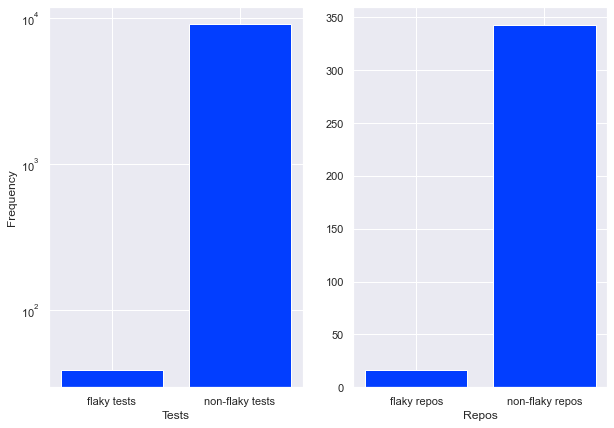

In [8]:
figure = plt.figure(1, figsize=(10,7))

# Add subplot
plt1 = figure.add_subplot(121)
plt1.bar(['flaky tests', 'non-flaky tests'], [number_flaky_tests, number_non_flaky_tests])
plt.yscale('log')
plt.grid(True)
plt.xlabel('Tests')
plt.ylabel('Frequency')

# Add subplot
plt2 = figure.add_subplot(122)
plt2.bar(["flaky repos", "non-flaky repos"], [number_of_flaky_repos, number_of_succeeded_repos-number_of_flaky_repos])
plt.xlabel('Repos')
plt.grid(True)

if savefig:
    plt.savefig("./figures/flaky_tests_flaky_repos.png", dpi=1200)

plt.show()

### Information about the flaky tests

flaky?
non-order-dependent      22
not flaky              9049
order-dependent          17
Name: Project_Name, dtype: int64


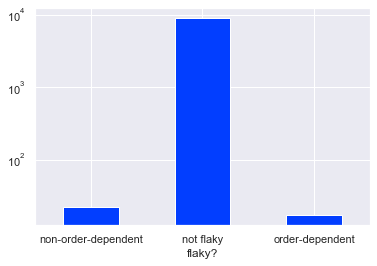

In [9]:
df_flaky = df.groupby('flaky?').count()['Project_Name']
print(df_flaky)
plt.yscale('log')
df_flaky.plot(kind='bar', rot=0)
plt.grid(True)
#plt.savefig("./figures/flaky_nonFlaky_ratio.png", dpi=1200)
plt.show()

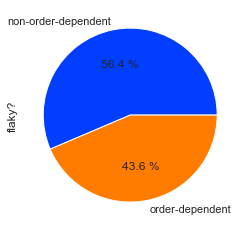

In [10]:
df_flaky = df[flaky_tests_bool]
ax = df_flaky['flaky?'].value_counts().plot(kind='pie', autopct='%.1f %%')

if savefig:
    plt.savefig("./figures/flaky_type_ratio.png", dpi=1200)

plt.show()

### Passing rate of same order

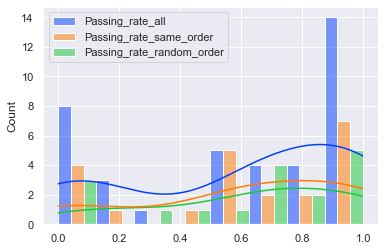

In [11]:
NOD_df = df_flaky[df_flaky['flaky?'] == 'non-order-dependent']
OD_df = df_flaky[df_flaky['flaky?'] == 'order-dependent']
passed = NOD_df['Passed_sameOrder']
failed = NOD_df['Failed_sameOrder']
skipped = NOD_df['Skipped_sameOrder']
error = NOD_df['Error_sameOrder']
ratio = passed / (passed + failed + skipped + error)

ratio = pd.DataFrame(ratio)
ratio = ratio.rename(columns={ratio.columns[0]:'Passing_rate_same_order'})

passed_rdm = OD_df['Passed_randomOrder']
failed_rdm = OD_df['Failed_randomOrder']
skipped_rdm = OD_df['Skipped_randomOrder']
error_rdm = OD_df['Error_randomOrder']
ratio_rdm = passed_rdm / (passed_rdm + failed_rdm + skipped_rdm + error_rdm)
ratio_rdm = pd.DataFrame(ratio_rdm)
ratio_rdm = ratio_rdm.rename(columns={ratio_rdm.columns[0]:'Passing_rate_random_order'})

passed_all = df_flaky['Passed_sameOrder'] + df_flaky['Passed_randomOrder']
failed_all = df_flaky['Failed_sameOrder'] + df_flaky['Failed_randomOrder']
error_all = df_flaky['Error_sameOrder'] + df_flaky['Failed_randomOrder']
skipped_all = df_flaky['Skipped_sameOrder'] + df_flaky['Skipped_randomOrder']

ratio_all = passed_all / (passed_all + failed_all + error_all + skipped_all)
ratio_all = pd.concat([ratio_all, ratio, ratio_rdm], axis=1)
ratio_all = ratio_all.rename(columns={ratio_all.columns[0]:'Passing_rate_all'})


sbn.histplot(ratio_all, multiple="dodge", kde=True)


if savefig:
    plt.savefig("./figures/passing_rate_all_order.png", dpi=1200)
plt.show()



In [12]:
df_flaky_new = pd.concat((df_flaky, ratio), axis=1)
df_flaky_new = pd.concat((df_flaky_new, ratio_rdm), axis=1)
df_flaky_new

,Project_Name,Project_URL,Project_Hash,Test_filename,Test_classname,Test_funcname,Test_parametrization,flaky?,Verdicts_sameOrder,Passed_sameOrder,...,Flaky_sameOrder_withinIteration,Flaky_randomOrder_withinIteration,Verdict_sameOrder,Verdict_randomOrder,Order-dependent,Flaky_Infrastructure,Test_nodeid,Test_nodeid_inclPara,Passing_rate_same_order,Passing_rate_random_order
13,BT-Tracker,/scratch/scharnboec/FlakyRoot/projects/BT-Tracker,NaN,NaN,pynguin_auto_tests_1653025019936_4310024.test_...,test_case_0,NaN,order-dependent,{'Passed'},200,...,False,True,Passed,Flaky,True,False,pynguin_auto_tests_1653025019936_4310024/test_...,pynguin_auto_tests_1653025019936_4310024/test_...,NaN,0.975
272,Penman,/scratch/scharnboec/FlakyRoot/projects/Penman,NaN,NaN,pynguin_auto_tests_1653025019947_6531505.test_...,test_case_6,NaN,non-order-dependent,"{'Failed', 'Passed'}",38,...,True,True,Flaky,Flaky,False,False,pynguin_auto_tests_1653025019947_6531505/test_...,pynguin_auto_tests_1653025019947_6531505/test_...,0.190,NaN
485,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_2,NaN,order-dependent,{'Passed'},200,...,False,True,Passed,Flaky,True,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,NaN,0.680
487,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_4,NaN,order-dependent,{'Passed'},200,...,False,True,Passed,Flaky,True,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,NaN,0.730
490,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_7,NaN,order-dependent,{'Passed'},200,...,False,True,Passed,Flaky,True,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,NaN,0.645
491,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_8,NaN,order-dependent,{'Passed'},200,...,False,True,Passed,Flaky,True,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,NaN,0.740
607,Tale,/scratch/scharnboec/FlakyRoot/projects/Tale,NaN,NaN,pynguin_auto_tests_1653025019677_3296969.test_...,test_case_0,NaN,order-dependent,{'Failed'},0,...,False,True,Failed,Flaky,True,False,pynguin_auto_tests_1653025019677_3296969/test_...,pynguin_auto_tests_1653025019677_3296969/test_...,NaN,0.760
641,access-modifiers,/scratch/scharnboec/FlakyRoot/projects/access-...,NaN,NaN,pynguin_auto_tests_1653025019959_4930659.test_...,test_case_1,NaN,order-dependent,{'Failed'},0,...,False,True,Failed,Flaky,True,False,pynguin_auto_tests_1653025019959_4930659/test_...,pynguin_auto_tests_1653025019959_4930659/test_...,NaN,0.410
642,access-modifiers,/scratch/scharnboec/FlakyRoot/projects/access-...,NaN,NaN,pynguin_auto_tests_1653025019959_4930659.test_...,test_case_2,NaN,order-dependent,{'Passed'},200,...,False,True,Passed,Flaky,True,False,pynguin_auto_tests_1653025019959_4930659/test_...,pynguin_auto_tests_1653025019959_4930659/test_...,NaN,0.580
3350,freegs,/scratch/scharnboec/FlakyRoot/projects/freegs,NaN,NaN,pynguin_auto_tests_1653025019702_4474261.test_...,test_case_0,NaN,non-order-dependent,"{'Failed', 'Passed'}",199,...,True,False,Flaky,Passed,False,False,pynguin_auto_tests_1653025019702_4474261/test_...,pynguin_auto_tests_1653025019702_4474261/test_...,0.995,NaN


### Use passing and failing rate and calculate the probabilities of detecting a flaky test after n reruns as proposed by Gruber et al.

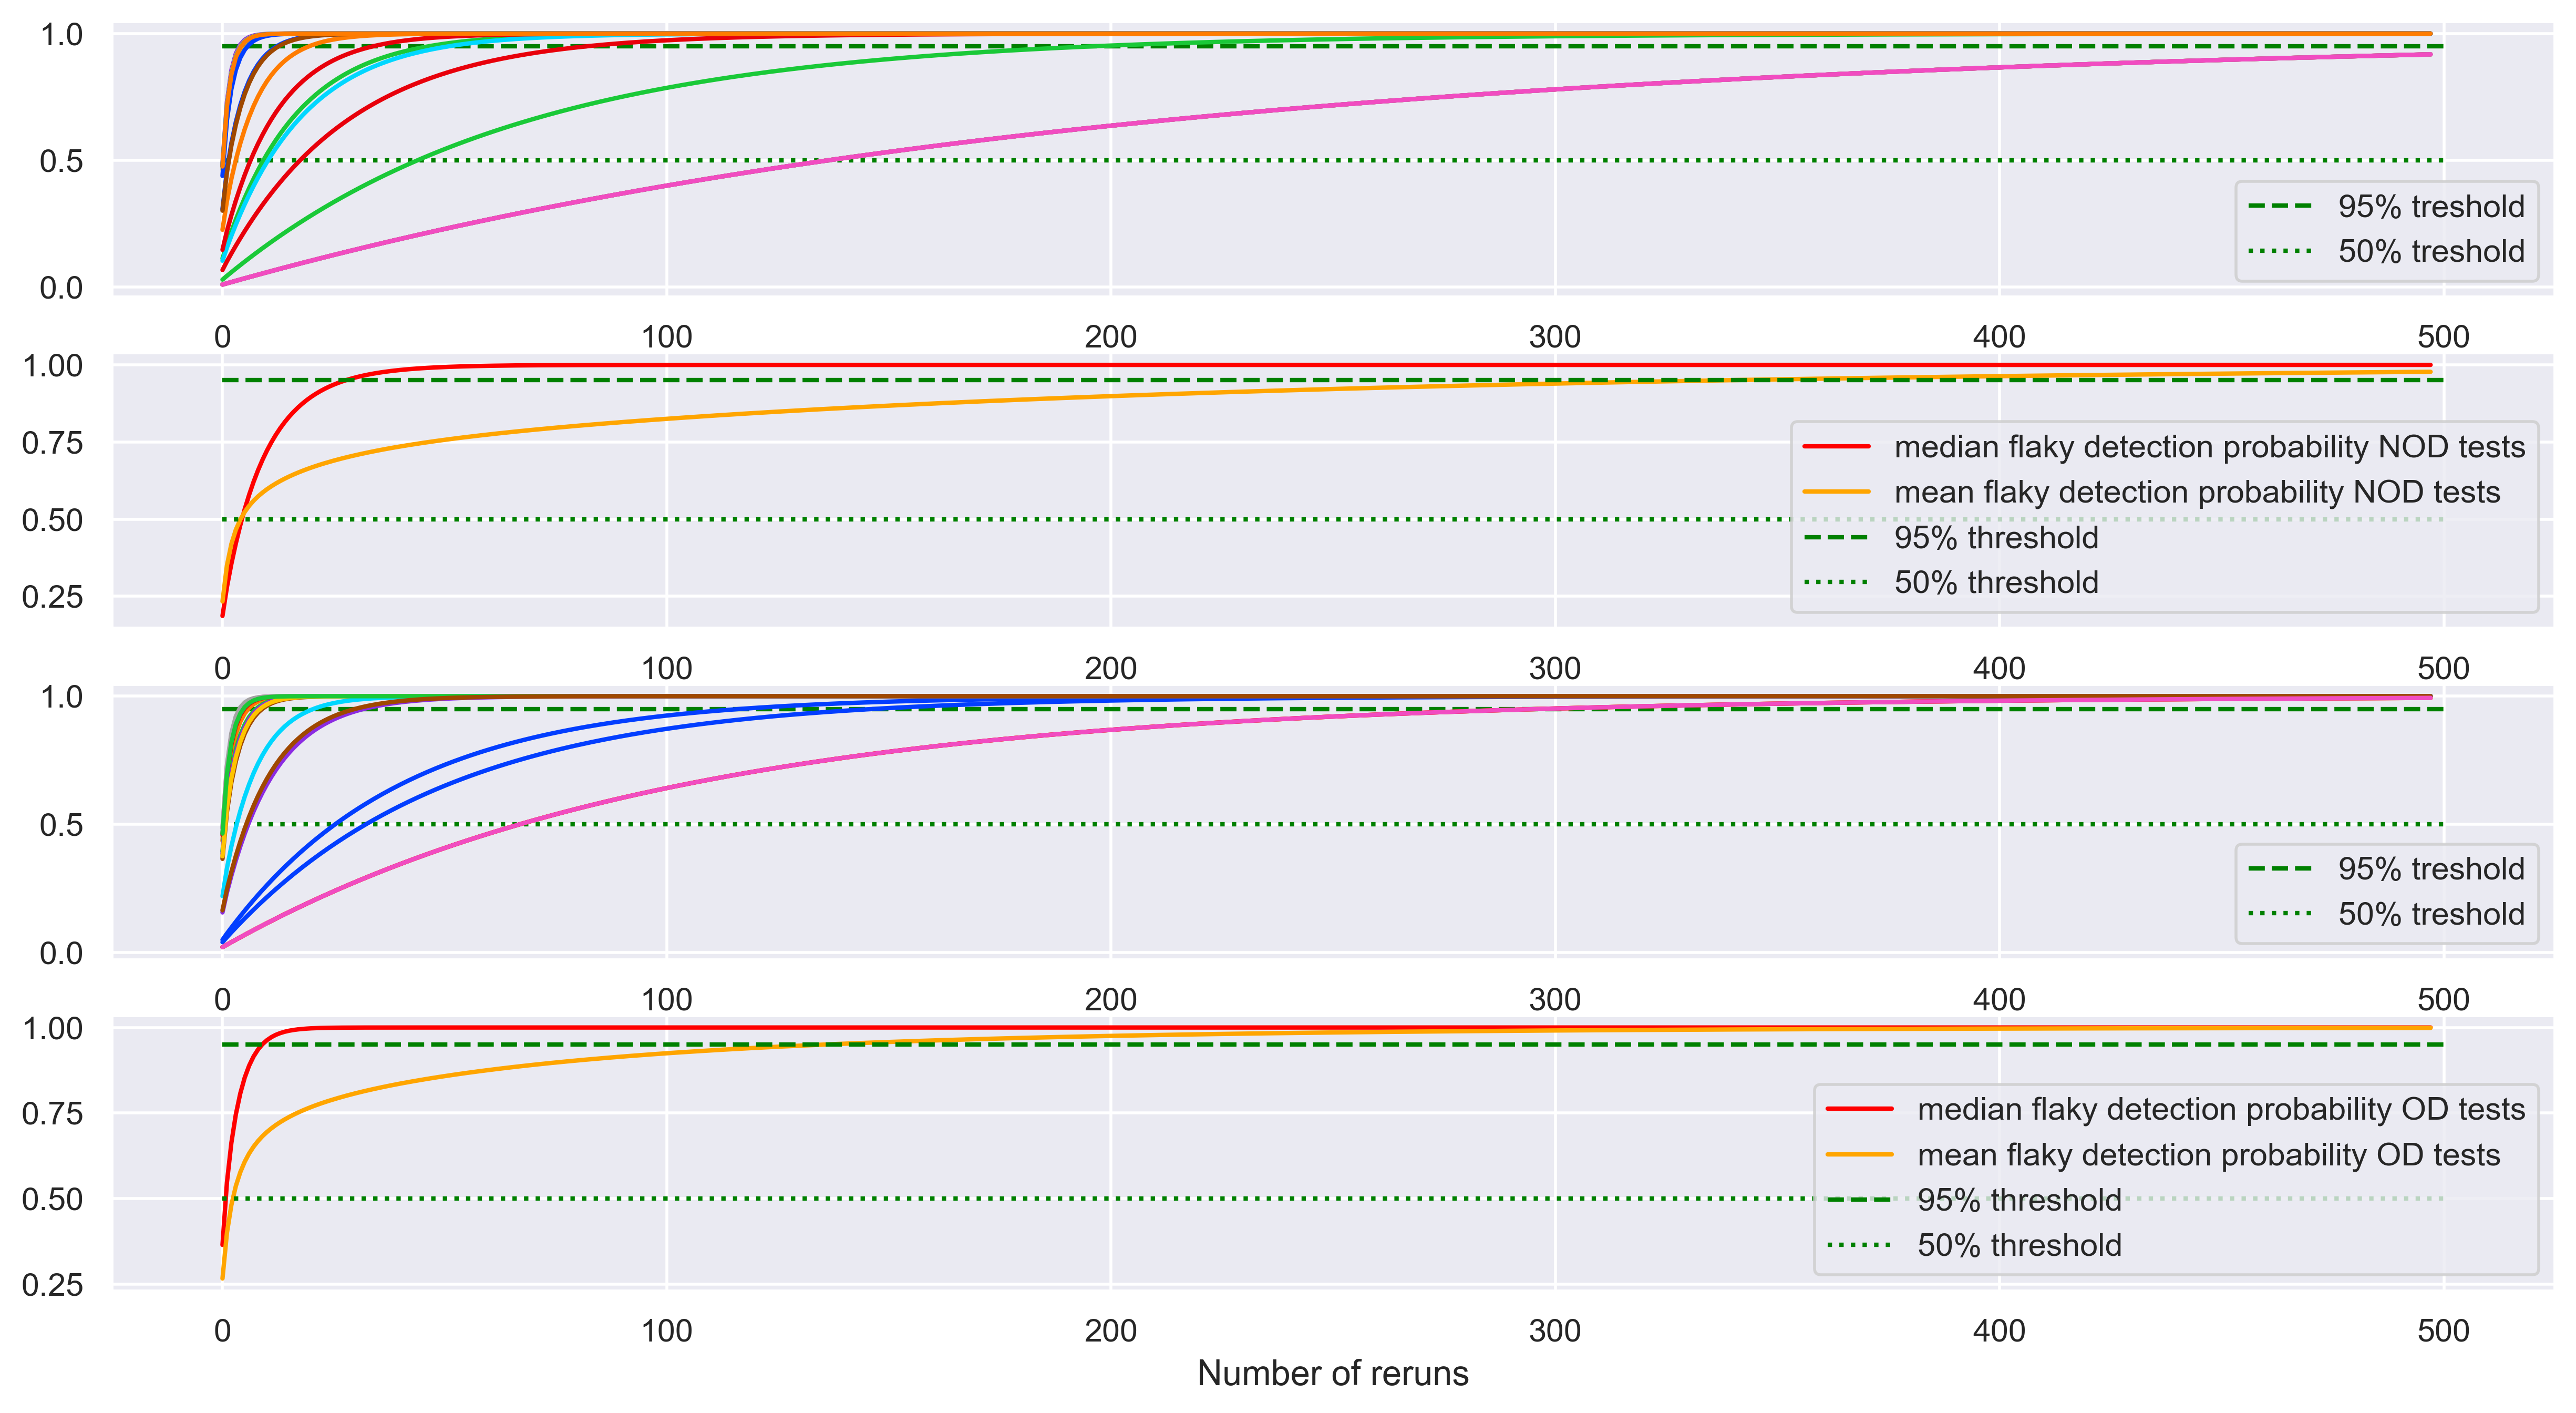

In [13]:
# Probability of a fail or error
prob_fail_error_so = (failed + error) / (passed + failed + error)
prob_fail_error_rdm = (failed_rdm + error_rdm) / (passed_rdm + failed_rdm + error_rdm)

# Probability of a passed test
prob_passed_so = passed / (passed + failed + error)
prob_passed_rdm = passed_rdm / (passed_rdm + failed_rdm + error_rdm)

def calc_probability_of_unveiling_flakiness(fail_error_probability, pass_probability, num_runs: int):
    lsg = 1 - (1 - pass_probability)**num_runs - (1 - fail_error_probability)**num_runs + (1 - pass_probability - fail_error_probability)**num_runs
    return lsg
frame = DataFrame()
for i in range(2, 500):
    frame = pd.concat([frame, calc_probability_of_unveiling_flakiness(fail_error_probability=prob_fail_error_so, pass_probability=prob_passed_so, num_runs=i)], axis=1, ignore_index=True)
frame_rdm = DataFrame()
for i in range(2, 500):
    frame_rdm = pd.concat([frame_rdm, calc_probability_of_unveiling_flakiness(fail_error_probability=prob_fail_error_rdm, pass_probability=prob_passed_rdm, num_runs=i)], axis=1, ignore_index=True)


frame_median = frame.median(axis=0)
fig = plt.figure(figsize=(15,8), dpi=400)

plot1 = fig.add_subplot(411)
plot2 = fig.add_subplot(412)
plot3 = fig.add_subplot(413)
plot4 = fig.add_subplot(414)

# Plot the probabilities by rerun of all NOD flaky tests
plot1.plot([0, 500], [0.95, 0.95], color='green', linestyle='--')
plot1.plot([0, 500], [0.50, 0.50], color='green', linestyle='dotted')
plot1.legend(['95% treshold', '50% treshold'])
plot1.plot(frame.T)
plot1.grid(True)

# Plot the probabilities by rerun of the median and mean of all flaky test probabilities
plot2.plot(frame_median, color="red")
plot2.plot(frame.mean(), color="orange")
plot2.plot([0, 500], [0.95, 0.95], color='green', linestyle='--')
plot2.plot([0, 500], [0.50, 0.50], color='green', linestyle='dotted')
plot2.legend(['median flaky detection probability NOD tests', 'mean flaky detection probability NOD tests', '95% threshold', '50% threshold'], loc='lower right')
plot2.grid(True)
plt.xlabel('Number of reruns')

# Plot the probabilities by rerun of all OD flaky tests
plot3.plot([0, 500], [0.95, 0.95], color='green', linestyle='--')
plot3.plot([0, 500], [0.50, 0.50], color='green', linestyle='dotted')
plot3.legend(['95% treshold', '50% treshold'])
plot3.plot(frame_rdm.T)
plot3.grid(True)

# Plot the probabilities by rerun of the median and mean of all flaky test probabilities
plot4.plot(frame_rdm.median(), color="red")
plot4.plot(frame_rdm.mean(), color="orange")
plot4.plot([0, 500], [0.95, 0.95], color='green', linestyle='--')
plot4.plot([0, 500], [0.50, 0.50], color='green', linestyle='dotted')
plot4.legend(['median flaky detection probability OD tests', 'mean flaky detection probability OD tests', '95% threshold', '50% threshold'], loc='lower right')
plot4.grid(True)
plt.xlabel('Number of reruns')

if savefig:
    plt.savefig("./figures/flaky_detection_probability.png", dpi=1200)
plt.show()

[Text(0.5, 0, 'Number of flaky tests'), Text(0, 0.5, 'Project name')]

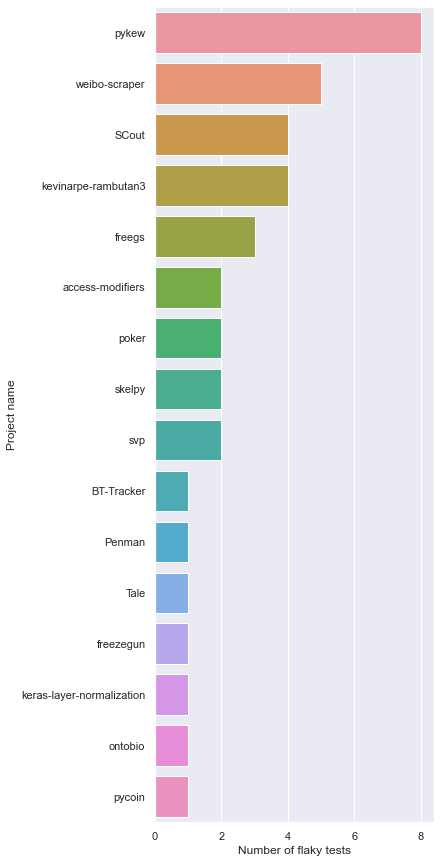

In [14]:
#sbn.histplot(data=frame.T, legend=False)
plt.figure(figsize=(5,15))

df_flaky_grouped_by_project = df_flaky.groupby('Project_Name').count()['Project_URL'].reset_index()
df_flaky_grouped_by_project = df_flaky_grouped_by_project.sort_values(by="Project_URL", ascending=False).reset_index()
ax = sbn.barplot(data=df_flaky_grouped_by_project, x='Project_URL', y='Project_Name')
ax.set(xlabel="Number of flaky tests", ylabel="Project name")

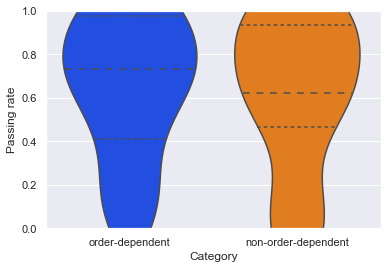

In [15]:
# Concatenate rdm and same order passing rate to violin plot NODs and ODs
df_flaky_new['Passing_rate_concat'] = df_flaky_new.fillna(0)['Passing_rate_same_order'] + df_flaky_new.fillna(0)['Passing_rate_random_order']
ax = sbn.violinplot(x='flaky?', y='Passing_rate_concat', data=df_flaky_new, inner='quartile')
plt.ylim((0,1))
ax.set(ylabel="Passing rate")
ax.set(xlabel="Category")
#sbn.histplot(df_flaky_reduced['Passing_rate_same_order'])

if savefig:
    plt.savefig("./figures/violinplot_passing_rate_by_category.png", dpi=1200)

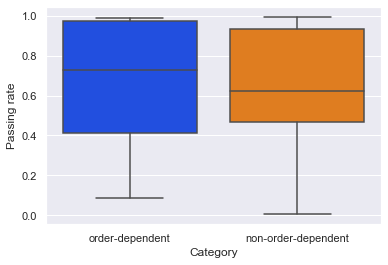

In [16]:
ax = sbn.boxplot(data=df_flaky_new, x='flaky?', y='Passing_rate_concat', dodge=True)
ax.set(ylabel="Passing rate")
ax.set(xlabel="Category")

if savefig:
    plt.savefig("./figures/boxplot_passing_rate_by_category.png", dpi=1200)

In [17]:
df_flaky['flaky?'].value_counts()

non-order-dependent    22
order-dependent        17
Name: flaky?, dtype: int64